In [1]:
from pathlib import Path
from rich.console import Console


path = "train_data/data_format-20230307T150506Z-001.zip"

assert Path(path).exists()

# Extract the zip file

In [2]:
import zipfile

zipfile.ZipFile(path).extractall("./train_data")

# check if the extraction is complete

In [3]:
from shutil import rmtree


assert Path("train_data", "data_format").exists(), "extracted data not found"

# Read xlsx files 🗒️🖊️

In [20]:
_xlsx_files = list(Path("train_data", "data_format").glob("*.xlsx"))

from rich.columns import Columns
from rich.panel import Panel

Console().print(Columns([Panel(str(x), style='green') for x in _xlsx_files], expand=True, title="[cyan]xlsx files found"))

# read xlsx file
import pandas as pd
csv_file = list(Path("train_data", "data_format").glob("*.csv"))

                                                 xlsx files found                                                  
╭──────────────────────────────────────────────────────╮ ╭────────────────────────────────────────────────────────╮
│ train_data/data_format/AI_API_INPUT_QUERY.xlsx       │ │ train_data/data_format/AI_API_OUTPUT_RESULT.xlsx       │
╰──────────────────────────────────────────────────────╯ ╰────────────────────────────────────────────────────────╯
╭──────────────────────────────────────────────────────╮ ╭────────────────────────────────────────────────────────╮
│ train_data/data_format/Data modification.xlsx        │ │ train_data/data_format/Gallery_Set.xlsx                │
╰──────────────────────────────────────────────────────╯ ╰────────────────────────────────────────────────────────╯

In [22]:
df = pd.read_csv(csv_file[0], skipinitialspace=True)

In [68]:
df_cpy = df.copy()

In [69]:
df_cpy.fillna('None', inplace=True)

In [70]:
df_cpy.head(10)

,Context,Questions,Decision,Answers_client,Answer_partner
0,Scope Definition,"Based on the IT build solution architecture, c...",YES,Detailed technical solution design document wi...,None
1,Scope Definition,Create an inventory of IT components (which ar...,YES,Detailed architecture diagram along with list ...,None
2,Scope Definition,Create an IT build solution architecture diagr...,YES,Detailed architecture diagram along with list ...,None
3,Scope Definition,Determine the Information Asset Relative Value...,YES,Ultimus expect it to handled by UBL team. Ulti...,None
4,Scope Definition,Indicate with labels and arrows on the IT buil...,YES,Detailed architecture diagram along with list ...,None
5,Access Control,Build or configure solution such that inactive...,YES,Ultimus allows to add active directory user di...,None
6,Access Control,Build or configure solution such that staff as...,YES,Staff can only perform authorized activities.,None
7,Access Control,Build solution such that encryption at storage...,YES,Ultimus supports encryption. This point can be...,None
8,Access Control,Build solutions such that if a session has bee...,YES,The configuration is available.,None
9,Access Control,To securely build the infrastructure of a solu...,YES,All Ultimus modules can be acessed only by aut...,None


# Plotting the Histogram 📊

In [71]:
df_cpy['Context'].value_counts()

Document Management System                                                84
BPM Platform-Developing Automated Processes – Process Flow & Execution    52
Access Control & User Security                                            47
None                                                                      39
Workflow Management                                                       38
                                                                          ..
Cost Associated                                                            1
Implementation Support                                                     1
Compliance                                                                 1
Anti-Malware                                                               1
Data Destruction                                                           1
Name: Context, Length: 63, dtype: int64

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


sns.set_style("darkgrid")



df_cpy['Decision'].value_counts()


No                        312
Yes                       301
YES                       103
None                        5
NO                          1
No\n                        1
No\n(Same as REQ_WF37)      1
Name: Decision, dtype: int64

# Decision Column preprocessing

Before processing 🛠️

<AxesSubplot: >

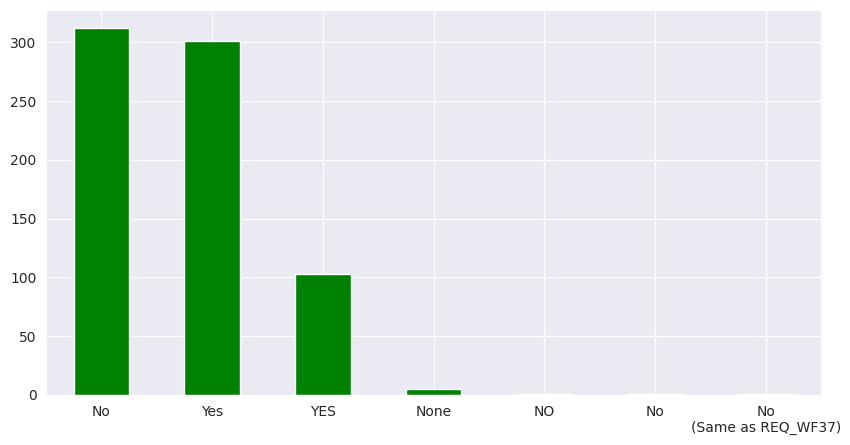

In [73]:
df_cpy['Decision'].value_counts().plot(kind='bar', figsize=(10, 5), rot=0, color='green')

In [51]:
df_cpy['Decision'] = df_cpy['Decision'].replace('YES', 'Yes')

In [52]:
df_cpy['Decision'] = df_cpy['Decision'].replace('NO', 'No')

In [55]:
df_cpy['Decision'] = df_cpy['Decision'].replace('No\n', 'No')
df_cpy['Decision'] = df_cpy['Decision'].replace('No\n(Same as REQ_WF37)', 'No')

df_cpy['Decision'].value_counts()



Yes     404
No      315
None      5
Name: Decision, dtype: int64

After processing 🛠️

<AxesSubplot: >

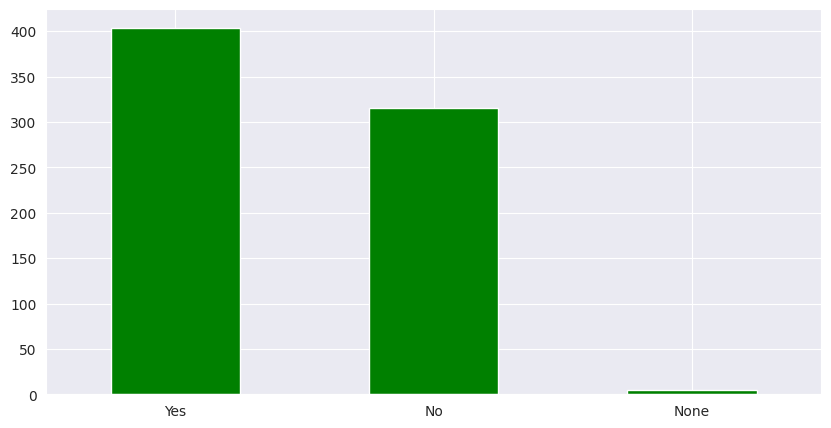

In [57]:
df_cpy['Decision'].value_counts().plot(kind='bar', figsize=(10, 5), rot=0, color='green')

# Context Column distribution 📊

<AxesSubplot: title={'center': 'Context column counts'}, ylabel='Counts --->'>

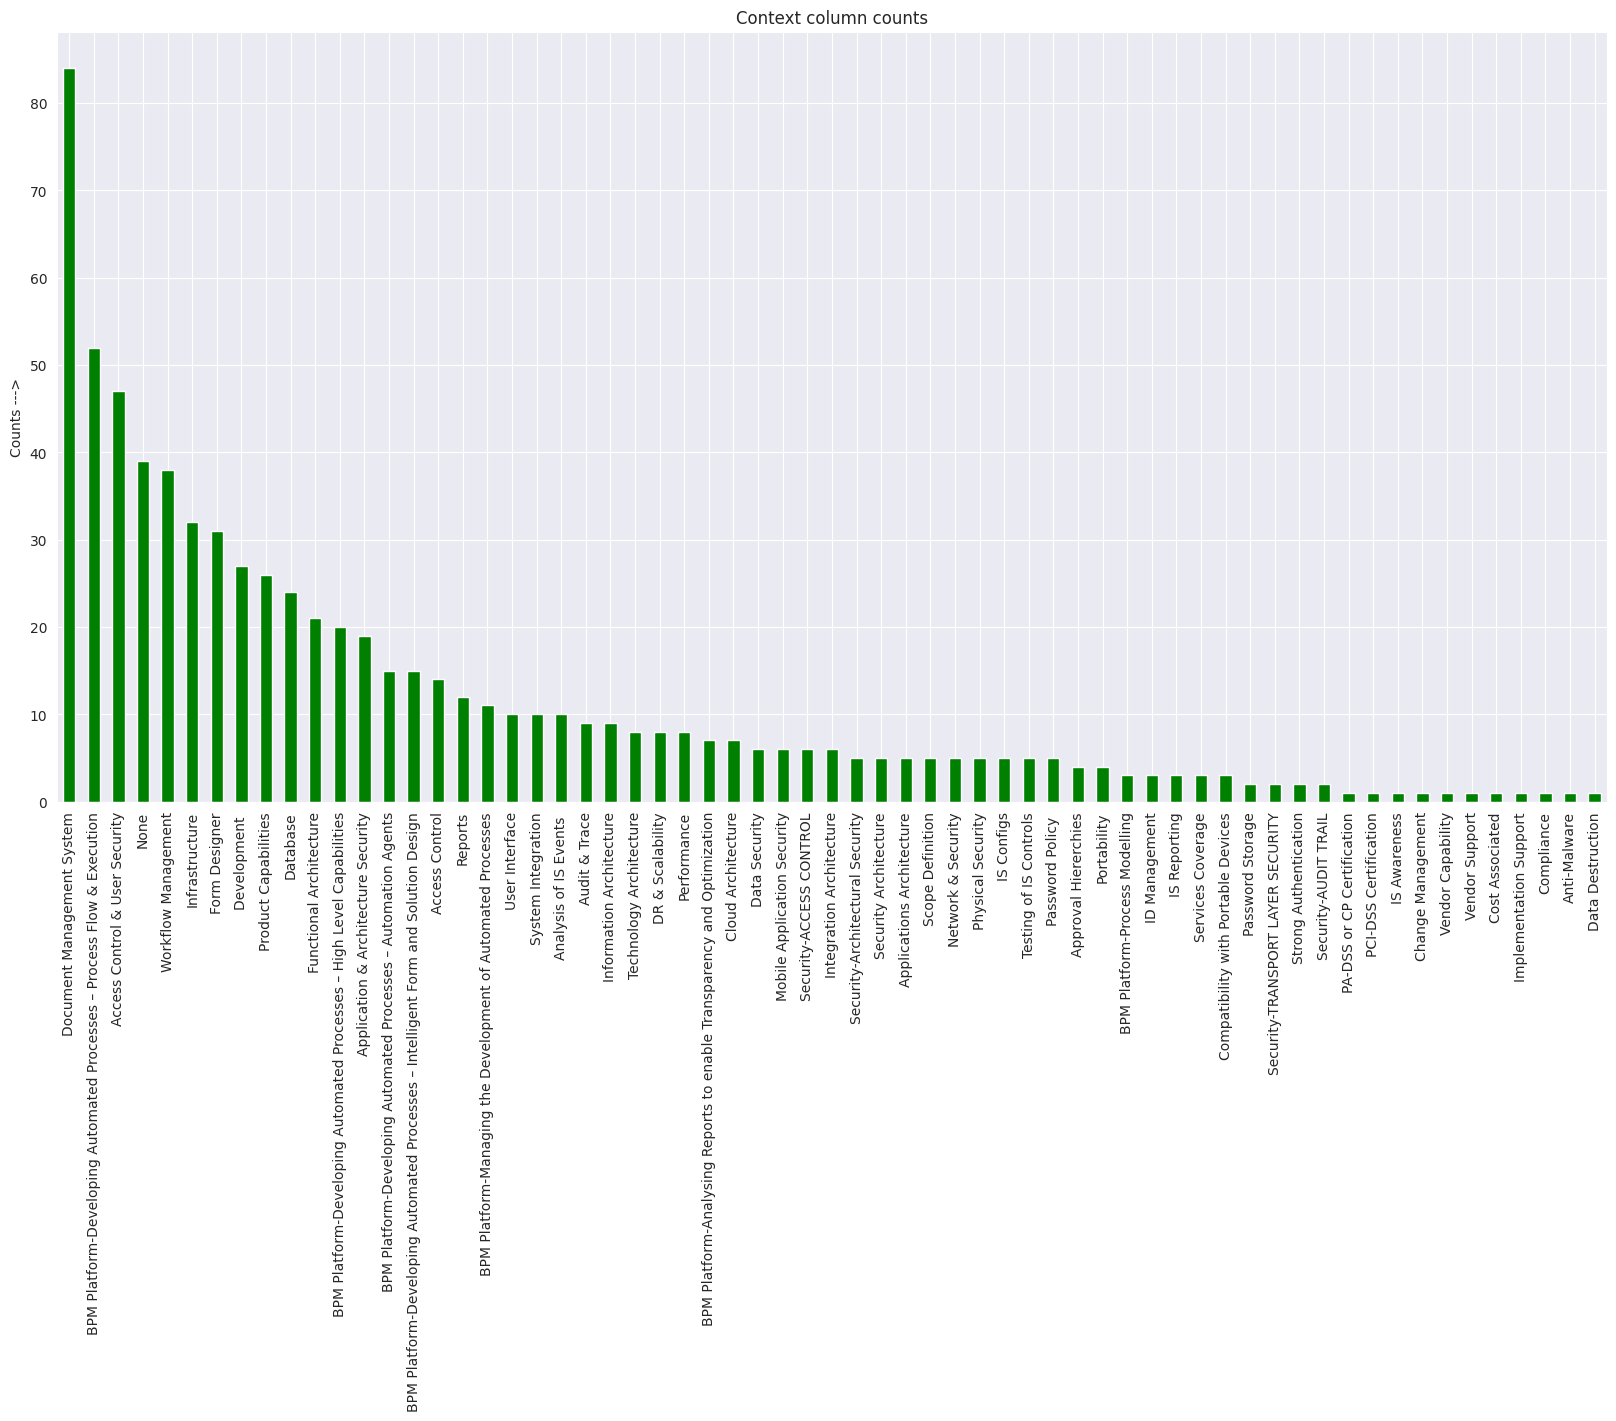

In [67]:
df_cpy['Context'].value_counts().plot(kind='bar', figsize=(20, 10), rot=90, color='green', title='Context column counts', ylabel='Counts --->')